# PROJECT DESCRIPTION

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

IMPORTING LIBRARIES

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
rawdata=open(r"C:\Users\No\OneDrive\Desktop\DATATRAINED\WA_Fn-UseC_-HR-Employee-Attrition.csv",'rb').read()
result=chardet.detect(rawdata)
charenc=result['encoding']
print(charenc)

UTF-8-SIG


In [6]:
df=pd.read_csv(r"C:\Users\No\OneDrive\Desktop\DATATRAINED\WA_Fn-UseC_-HR-Employee-Attrition.csv",encoding="UTF-8-SIG")

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [9]:
#checking data info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The datasat consists of 35 columns including the target column Attrition and 1470 rows

In [10]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

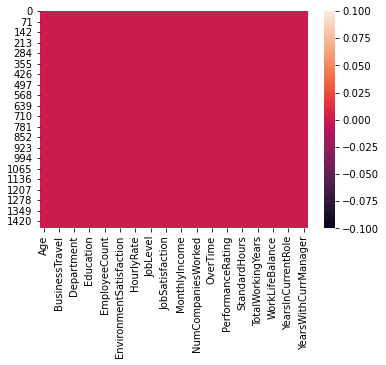

In [11]:
#Checking null values using heatmap
sns.heatmap(df.isnull())

There are no null values in the dataset

In [12]:
#checking the unique values in each column
{column:len(df[column].unique()) for column in df.columns}

{'Age': 43,
 'Attrition': 2,
 'BusinessTravel': 3,
 'DailyRate': 886,
 'Department': 3,
 'DistanceFromHome': 29,
 'Education': 5,
 'EducationField': 6,
 'EmployeeCount': 1,
 'EmployeeNumber': 1470,
 'EnvironmentSatisfaction': 4,
 'Gender': 2,
 'HourlyRate': 71,
 'JobInvolvement': 4,
 'JobLevel': 5,
 'JobRole': 9,
 'JobSatisfaction': 4,
 'MaritalStatus': 3,
 'MonthlyIncome': 1349,
 'MonthlyRate': 1427,
 'NumCompaniesWorked': 10,
 'Over18': 1,
 'OverTime': 2,
 'PercentSalaryHike': 15,
 'PerformanceRating': 2,
 'RelationshipSatisfaction': 4,
 'StandardHours': 1,
 'StockOptionLevel': 4,
 'TotalWorkingYears': 40,
 'TrainingTimesLastYear': 7,
 'WorkLifeBalance': 4,
 'YearsAtCompany': 37,
 'YearsInCurrentRole': 19,
 'YearsSinceLastPromotion': 16,
 'YearsWithCurrManager': 18}

As we see there are many columns which only have 1 unique values those columns are of no use to predict the Attriton of an employee

In [13]:
# droping single value columns and id columns
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [14]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [15]:
#getting all the object columns
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Attrition': 2,
 'BusinessTravel': 3,
 'Department': 3,
 'EducationField': 6,
 'Gender': 2,
 'JobRole': 9,
 'MaritalStatus': 3,
 'OverTime': 2}

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
#binary encoding columns Gender and OverTimeand attrition column
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
df['OverTime']=df['OverTime'].replace({'No':0,'Yes':1})
df['Attrition']=df['Attrition'].replace({'No':0,'Yes':1})

In [19]:
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'BusinessTravel': 3,
 'Department': 3,
 'EducationField': 6,
 'JobRole': 9,
 'MaritalStatus': 3}

In [20]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [21]:
df['BusinessTravel']=df['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})

In [22]:
{column:len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Department': 3, 'EducationField': 6, 'JobRole': 9, 'MaritalStatus': 3}

In [25]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.getdummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df=df.drop(column,axis=1)
    return df

In [26]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,Research & Development,23,2,Medical,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,1,613,Research & Development,6,1,Medical,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,1,155,Research & Development,4,3,Life Sciences,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,2,1023,Sales,2,3,Medical,4,1,...,3,4,0,17,3,2,9,6,0,8


In [27]:
df=pd.read_csv(r"C:\Users\No\OneDrive\Desktop\DATATRAINED\WA_Fn-UseC_-HR-Employee-Attrition.csv",encoding="UTF-8-SIG")

In [28]:
# droping single value columns and id columns
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [35]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df=df.drop(column,axis=1)
    return df

In [31]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [32]:
#binary encoding columns Gender and OverTimeand attrition column
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
df['OverTime']=df['OverTime'].replace({'No':0,'Yes':1})
df['Attrition']=df['Attrition'].replace({'No':0,'Yes':1})

In [33]:
df['BusinessTravel']=df['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})

In [36]:
for column in ['Department', 'EducationField', 'JobRole', 'MaritalStatus']:
    df=onehot_encode(df,column=column)

In [37]:
df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,3,1,41,4,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,1,613,6,1,4,1,42,2,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,1,155,4,3,2,1,87,4,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,1023,2,3,4,1,63,2,...,0,0,0,0,0,1,0,0,1,0


# UNIVARIATE AND MULTI VARIATE ANALYSIS

In [39]:
x=df["BusinessTravel"]
y=df["Attrition"]

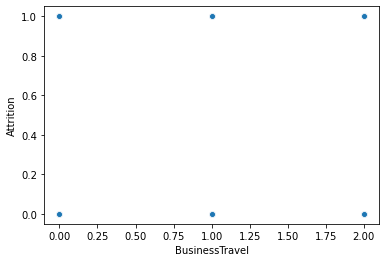

In [40]:
sns.scatterplot(x,y)

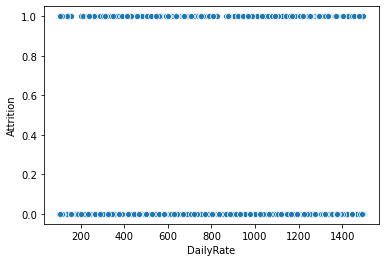

In [41]:
sns.scatterplot(x="DailyRate",y="Attrition",data=df)

In [42]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,-0.011807,0.010661,-0.001686,0.208034,0.010146,-0.036311,0.024287,0.029820,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185
Attrition,-0.159205,1.000000,0.127006,-0.056652,0.077924,-0.031373,-0.103369,0.029453,-0.006846,-0.130016,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,-0.009696,-0.008670,-0.011310,-0.044896,-0.004164,0.029300,...,0.002094,-0.039312,0.014893,-0.005138,0.002477,-0.025131,0.059995,-0.028444,0.002198,0.023017
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445
Education,0.208034,-0.031373,-0.008670,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
EnvironmentSatisfaction,0.010146,-0.103369,-0.011310,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035
Gender,-0.036311,0.029453,-0.044896,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,...,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,0.046076,-0.007804,-0.032752
HourlyRate,0.024287,-0.006846,-0.004164,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436
JobInvolvement,0.029820,-0.130016,0.029300,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,...,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253


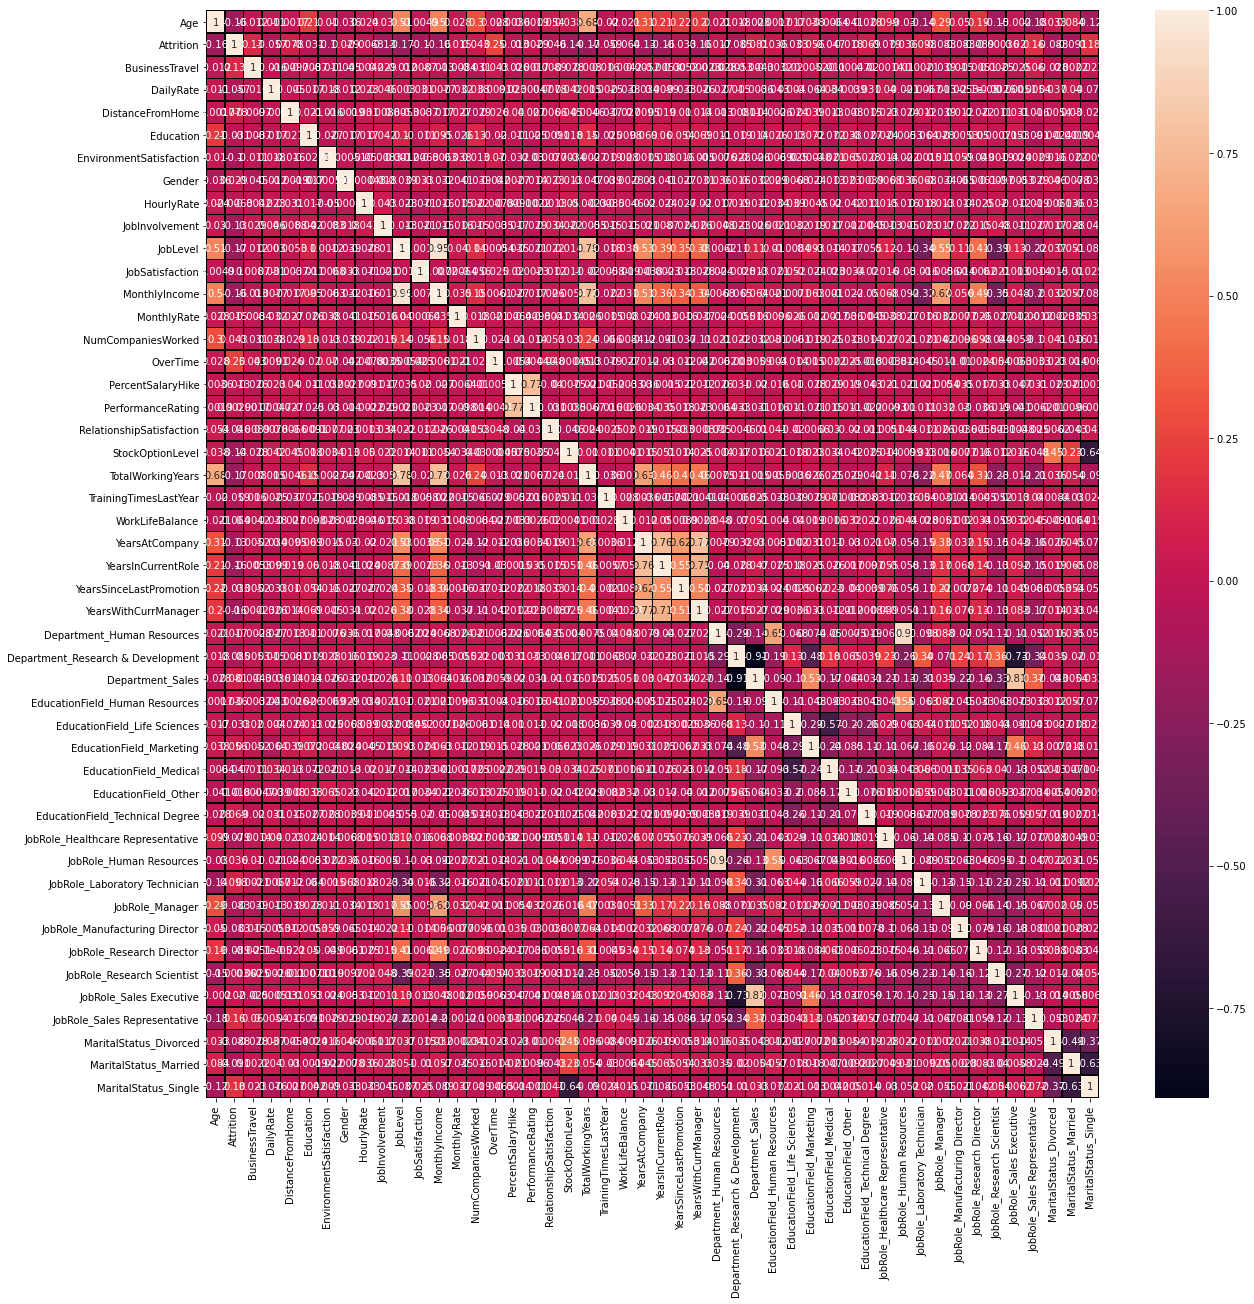

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black")

# Outliers Checking

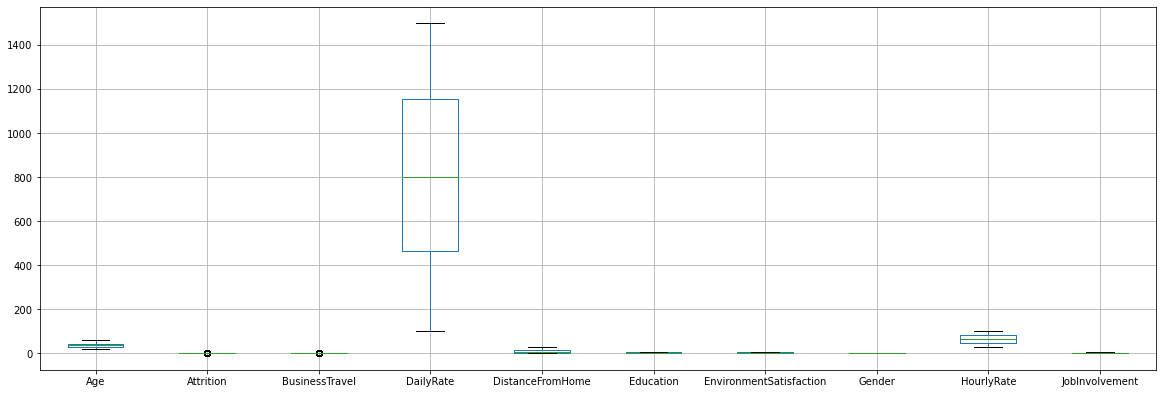

In [45]:
#checking outliers
df.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

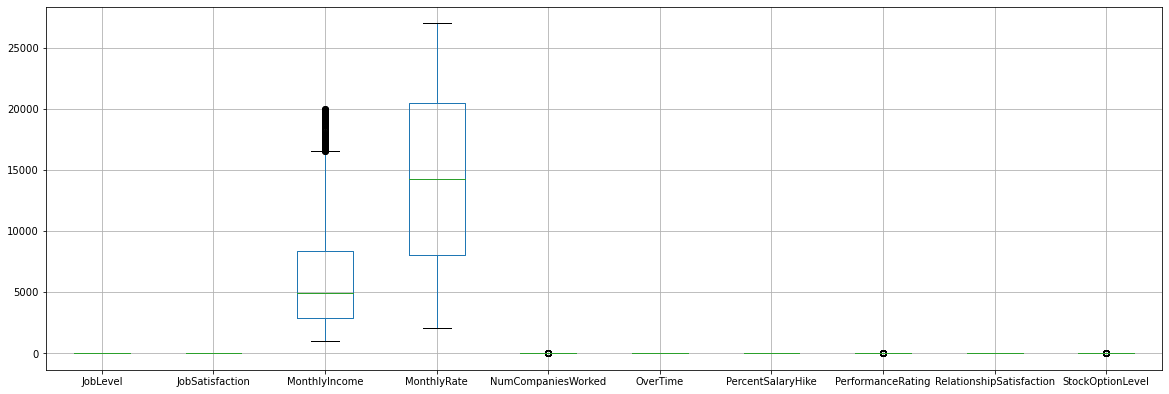

In [46]:
#checking outliers
df.iloc[:,10:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

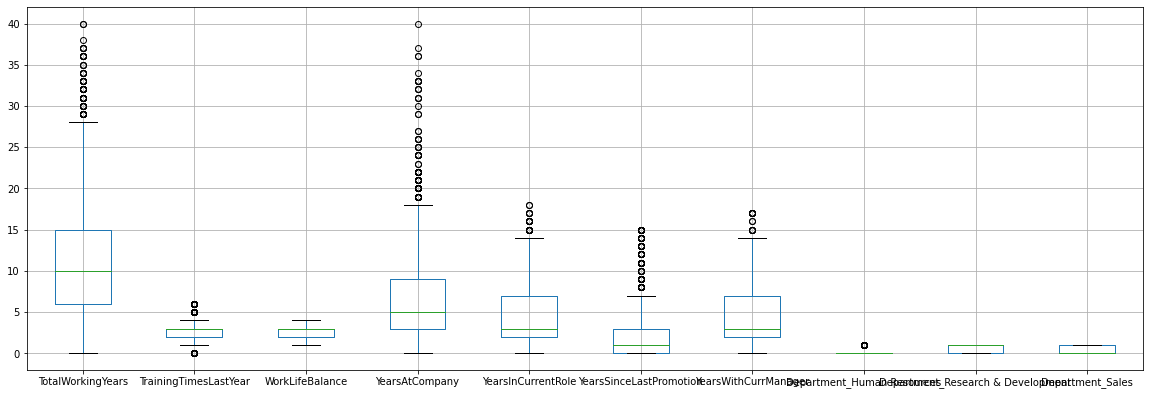

In [47]:
#checking outliers
df.iloc[:,20:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

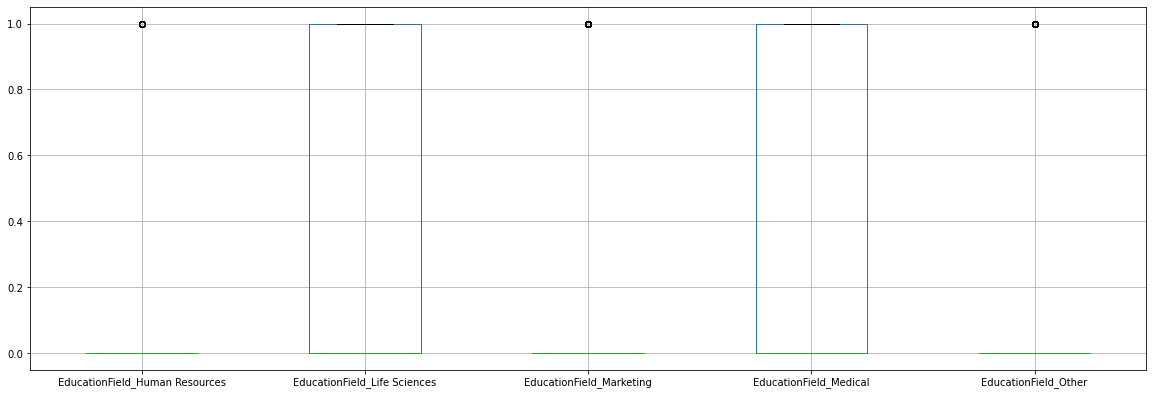

In [50]:
df.iloc[:,30:35].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

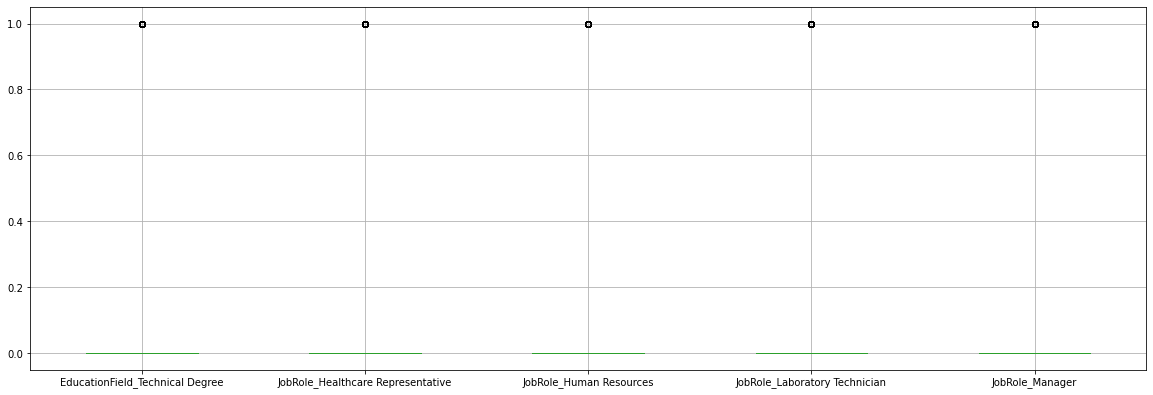

In [51]:
df.iloc[:,35:40].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

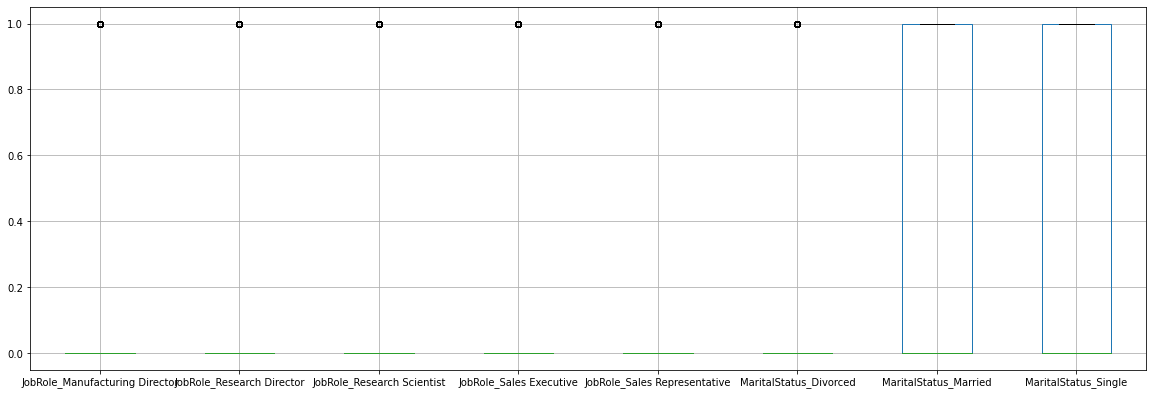

In [52]:
df.iloc[:,40:48].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

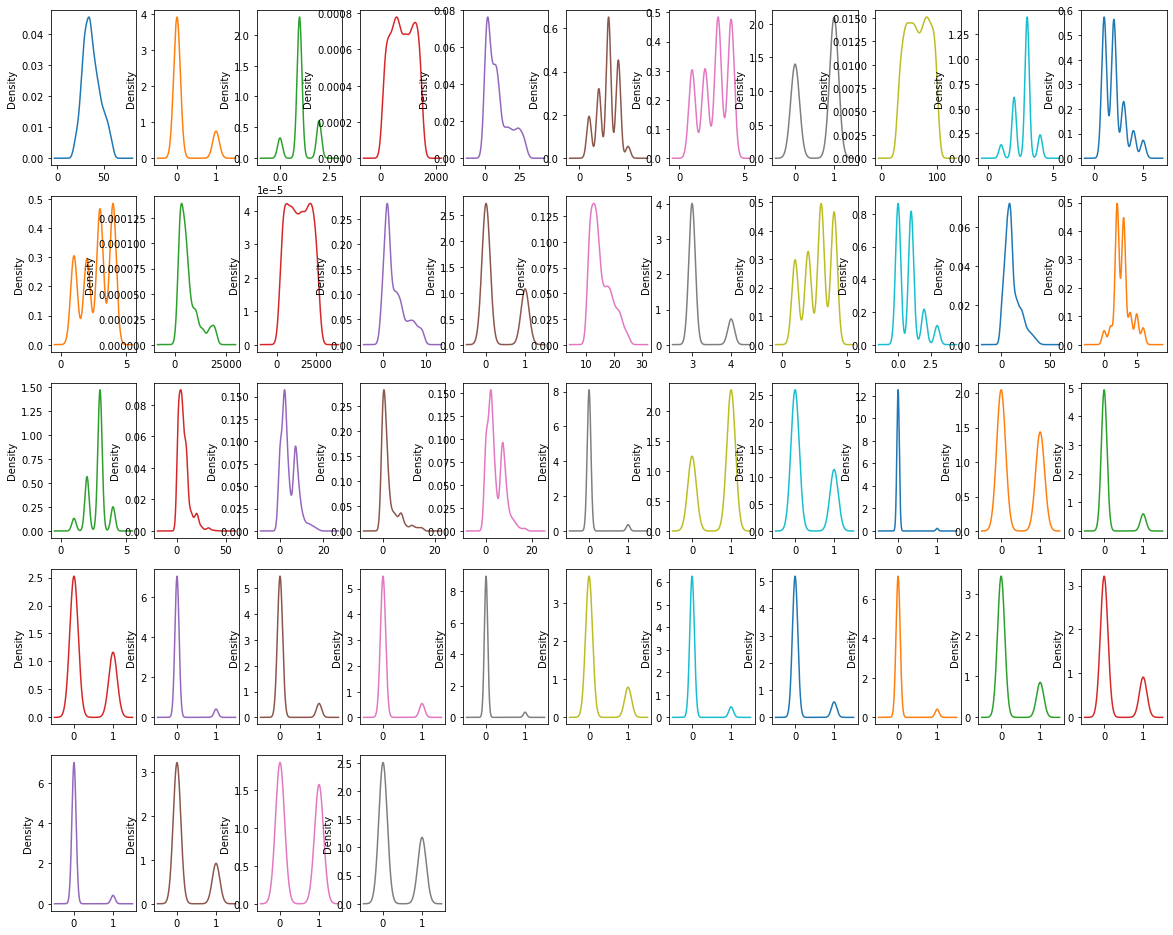

In [53]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,figsize=(20,20))
plt.show()

In [54]:
corr_matrix=df.corr()
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
OverTime                             0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel                       0.127006
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
Gender                               0.029453
JobRole_Sales Executive              0.019774
Department_Human Resources           0.016832
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other              

# REMOVING OUTLIERS

In [55]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1470, 48)

In [56]:
threshold=3
print(np.where(z>3))

(array([   2,    8,    9, ..., 1464, 1466, 1467], dtype=int64), array([34, 40, 36, ..., 44, 36, 40], dtype=int64))


In [57]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1470, 48)
(732, 48)


In [58]:
loss_percentage=(1470-732)/1470*100
print(loss_percentage)

50.204081632653065


Huge loss percentgage we will not consider removing outliers

# SPLITTING DATASET

In [60]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [61]:
#checking skewness....no problem if we do it after splitting because correcting skewness won't delete any rows
x.skew()

Age                                  0.413286
BusinessTravel                       0.082428
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
Gender                              -0.408665
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
OverTime                             0.964489
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                   

# REMOVING SKEWNESS

In [62]:
from sklearn.preprocessing import power_transform

In [66]:
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [67]:
x.skew()

Age                                  0.413286
BusinessTravel                       0.082428
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
Gender                              -0.408665
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
OverTime                             0.964489
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                   

In [68]:
x.shape

(1470, 47)

In [69]:
x=power_transform(x,method="yeo-johnson")

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.52213976, -0.15672226,  0.7592893 , ..., -0.53487311,
        -0.91892141,  1.45864991],
       [ 1.27641097,  1.70659233, -1.33459724, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.10209148, -0.15672226,  1.34036452, ..., -0.53487311,
        -0.91892141,  1.45864991],
       ...,
       [-1.12375507, -0.15672226, -1.75171312, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 1.27641097,  1.70659233,  0.58323545, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.23618832, -0.15672226, -0.35884464, ..., -0.53487311,
         1.08823234, -0.68556546]])

In [71]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# FINDING BEST RANDOM STATE

In [72]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy Score is: ",maxAccu,"on Random_state: ",maxRS)

Best Accuracy Score is:  0.9160997732426304 on Random_state:  123


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [74]:
def eval(x):
    mod=x
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [75]:
eval(LogisticRegression())

0.9160997732426304
[[373  11]
 [ 26  31]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       384
           1       0.74      0.54      0.63        57

    accuracy                           0.92       441
   macro avg       0.84      0.76      0.79       441
weighted avg       0.91      0.92      0.91       441



In [76]:
eval(DecisionTreeClassifier())

0.7755102040816326
[[324  60]
 [ 39  18]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       384
           1       0.23      0.32      0.27        57

    accuracy                           0.78       441
   macro avg       0.56      0.58      0.57       441
weighted avg       0.81      0.78      0.79       441



In [77]:
eval(SVC())

0.9047619047619048
[[383   1]
 [ 41  16]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       384
           1       0.94      0.28      0.43        57

    accuracy                           0.90       441
   macro avg       0.92      0.64      0.69       441
weighted avg       0.91      0.90      0.88       441



In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
eval(RandomForestClassifier())

0.8979591836734694
[[383   1]
 [ 44  13]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       384
           1       0.93      0.23      0.37        57

    accuracy                           0.90       441
   macro avg       0.91      0.61      0.66       441
weighted avg       0.90      0.90      0.87       441



# CROSS VALIDATION

In [80]:
scr=cross_val_score(LogisticRegression(),x,y,cv=5)
print("scr for LR",scr.mean())

scr for LR 0.882312925170068


In [81]:
scr=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("scr for DTC",scr.mean())

scr for DTC 0.7829931972789115


In [82]:
scr=cross_val_score(RandomForestClassifier(),x,y,cv=5)
print("scr for RFC",scr.mean())

scr for RFC 0.8571428571428571


In [83]:
scr=cross_val_score(SVC(),x,y,cv=5)
print("scr for SVM",scr.mean())

scr for SVM 0.8666666666666666


In [84]:
#calculating differencec between accuracy score and cv score
LR1=.9160-.8823
DTC1=.7755-.7829
RFC1=.8979-.8571
SVC1=.9047-.8666

In [85]:
LR1

0.03370000000000006

In [86]:
DTC1

-0.007400000000000073

In [87]:
RFC1

0.04080000000000006

In [88]:
SVC1

0.03809999999999991

From above we conclude that Decision tree classifier is the best model

In [91]:
from sklearn.model_selection import GridSearchCV

In [89]:
#parameters fort DTC()
parameters={'max_depth': np.arange(2,10),
           'criterion':['gini','entropy']}

In [92]:
GCV_DTC=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV_DTC.fit(x_train,y_train)
GCV_DTC.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [93]:
DTC_mod=DecisionTreeClassifier(criterion='entropy',max_depth=3)
DTC_mod.fit(x_train,y_train)
pred=DTC_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

86.84807256235828


# AUC_ROC Curve

In [95]:
from sklearn.metrics import plot_roc_curve

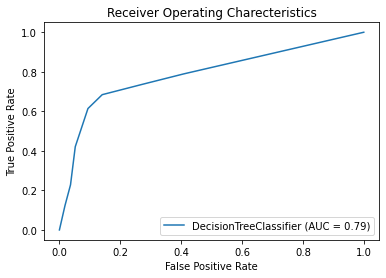

In [97]:
plot_roc_curve(DTC_mod,x_test,y_test)
plt.title("Receiver Operating Charecteristics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Model Saving 

In [98]:
import joblib
joblib.dump(DTC_mod,"HR_Analytics_Final_Model.pkl")

['HR_Analytics_Final_Model.pkl']